# HW 2
## Tim Demetriades
### AAI 646 - B - Hong Man
3/4/2022

#### Problem 2:

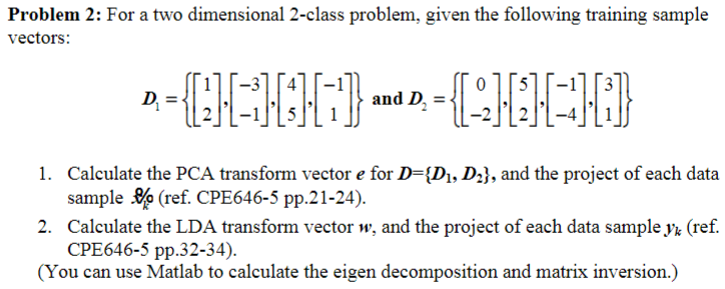

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d1 = np.array([[1, 2], 
               [-3, -1], 
               [4, 5], 
               [-1, 1]])
d2 = np.array([[0, -2],
               [5, 2],
               [-1, -4],
               [3, 1]])

Let's plot the data on a 2D grid to see how it looks.

Text(0.5, 1.0, 'Data')

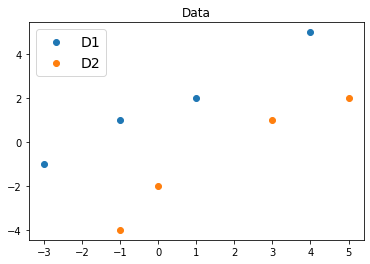

In [3]:
plt.scatter(x = d1[:, 0], y = d1[:, 1], label = 'D1')
plt.scatter(x = d2[:, 0], y = d2[:, 1], label = 'D2')
#plt.quiver(0, 0, *basis_vector, scale=5)
plt.legend(loc = "upper left", fontsize = 14)
plt.title('Data')

As can be seen in the plot above, the data is **linearly separable**.

Let's first perform **PCA**.

#### 1. PCA

The first step is to find the **sample mean vector**. This is the mean of all the data, so we will combine vectors **d1** and **d2** into one vector **d**.

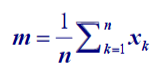

In [4]:
d = np.concatenate((d1, d2))
d

array([[ 1,  2],
       [-3, -1],
       [ 4,  5],
       [-1,  1],
       [ 0, -2],
       [ 5,  2],
       [-1, -4],
       [ 3,  1]])

In [5]:
n = len(d)
n

8

In [6]:
sample_mean = ((np.sum(d, axis = 0)) / n).reshape(-1, 1)
print(f'Sample mean = \n{sample_mean}')

Sample mean = 
[[1. ]
 [0.5]]


Next we can use the **sample mean** to find the **scatter matrix** (covariance matrix is just a scaled version of the scatter matrix). The scatter matrix is useful in that records the relationship between variables, which is important to find a dimension of **maximum variance**.

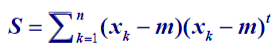

In [7]:
scatter_sum = np.zeros([2, 2])
scatter_matrix = np.zeros([2, 2])
for sample in d:
    scatter_sum = (sample - sample_mean.T).reshape(-1, 1) @ (sample - sample_mean.T).reshape(-1, 1).T
    scatter_matrix += scatter_sum

In [8]:
print(f'Scatter matrix = \n{scatter_matrix}')

Scatter matrix = 
[[54. 37.]
 [37. 54.]]


Now we have the **scatter matrix**, a 2x2 matrix. We can now do **eigenvalue decomposition** to find the **basis vector e**.

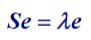

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(scatter_matrix)

In [10]:
eigenvalues

array([91., 17.])

In [11]:
eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [12]:
basis_vector = eigenvectors[1].reshape(-1, 1)
print(f'Basis vector = \n{basis_vector}')

Basis vector = 
[[0.70710678]
 [0.70710678]]


Now that we have the **basis vector e**, we can use it to find **a_k**, the **1D projectio**n of each sample of **feature vector x_k** onto the **basis vector**. a_k will be a list of 8 1D values (scalers), one for each sample.

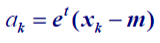

In [13]:
projection_list = []
for sample in d:
    projection = basis_vector.T @ (sample.reshape(-1, 1) - sample_mean)
    projection_list.append(float(projection))

In [14]:
projection_list

[1.0606601717798212,
 -3.8890872965260117,
 5.303300858899107,
 -1.0606601717798214,
 -2.4748737341529163,
 3.8890872965260117,
 -4.596194077712559,
 1.7677669529663689]

Finally, using the **basis vector** and the **1D projection** of each sample, we can multiply them and add back the **sample mean** to get the **reconstructed data**.

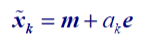

In [15]:
reconstructed_data = np.zeros([8, 2])
for i, projection in zip(range(n), projection_list):
    approximation = (sample_mean + projection * basis_vector).reshape(-1, 1)
    reconstructed_data[i] = approximation.T

In [16]:
print(f'Reconstructed Data = \n{reconstructed_data}')

Reconstructed Data = 
[[ 1.75  1.25]
 [-1.75 -2.25]
 [ 4.75  4.25]
 [ 0.25 -0.25]
 [-0.75 -1.25]
 [ 3.75  3.25]
 [-2.25 -2.75]
 [ 2.25  1.75]]


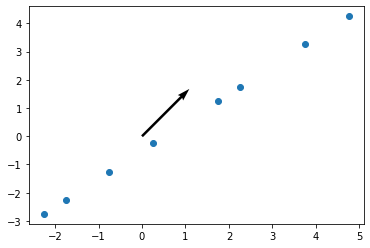

In [17]:
plt.scatter(x = reconstructed_data[:, 0], y = reconstructed_data[:, 1])
plt.quiver(0, 0, *basis_vector, scale=5)

Above you can see the **projection of each data sample onto the basis vector** (black arrow). These are the **principal components**.

You may notice that the principal components do a good job of **representing the data in a lower dimension**, in this case representing the 2-dimensional data in 1 dimension. However, it does not really do a good job at **separating the data**, which is why PCA is not really useful for **classification**. **Linear discriminant analysis**, or LDA, is another form of dimensionality reduction that can be used to separate the data, making it better for classification.

Now let's perform LDA.
#### 2. LDA

The first step is to find the **mean vector** for each class.

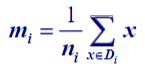

In [18]:
mean_1 = (d1.sum(axis = 0) / len(d1)).reshape(-1, 1)
mean_2 = (d2.sum(axis = 0) / len(d2)).reshape(-1, 1)
print(f'Mean 1 = \n{mean_1}')
print(f'Mean 2 = \n{mean_2}')

Mean 1 = 
[[0.25]
 [1.75]]
Mean 2 = 
[[ 1.75]
 [-0.75]]


Using the **mean vectors** for each class we can now find the **scatter matrices** for each class.

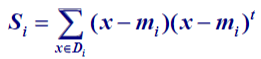

In [19]:
scatter_sum_1 = np.zeros([2, 2])
scatter_sum_2 = np.zeros([2, 2])
scatter_matrix_1 = np.zeros([2, 2])
scatter_matrix_2 = np.zeros([2, 2])
for sample in d1:
    scatter_sum_1 = (sample - mean_1.T).reshape(-1, 1) @ (sample - mean_1.T).reshape(-1, 1).T
    scatter_matrix_1 += scatter_sum_1
print(' ')
for sample in d2:
    scatter_sum_2 = (sample - mean_2.T).reshape(-1, 1) @ (sample - mean_2.T).reshape(-1, 1).T
    scatter_matrix_2 += scatter_sum_2

In [20]:
scatter_matrix_1

array([[26.75, 22.25],
       [22.25, 18.75]])

In [21]:
scatter_matrix_2

array([[22.75, 22.25],
       [22.25, 22.75]])

We can add the 2 **scatter matrices** to get the **within-class scatter matrix s_w**.

In [22]:
s_w = scatter_matrix_1 + scatter_matrix_2
print(f'Within-class scatter matrix = \n{s_w}')

Within-class scatter matrix = 
[[49.5 44.5]
 [44.5 41.5]]


The **inverse of the within-class scatter matrix** can be found and multiplied by the **difference in the mean vectors** to find the **transform vector w**.

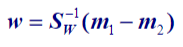

In [23]:
w = np.linalg.inv(s_w) @ (mean_1 - mean_2)
print(f'Mean vector = \n{w}')

Mean vector = 
[[-2.34459459]
 [ 2.57432432]]


Multiplying the **transpose of the transform vector w** by each element of the **feature vector x_k** gives **y_k**.

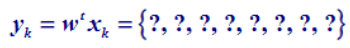

In [26]:
y_k = []
for sample in d:
    y_k_value = w.T @ (sample.reshape(-1, 1))
    y_k.append(float(y_k_value))

In [27]:
y_k

[2.8040540540540553,
 4.459459459459461,
 3.4932432432432456,
 4.918918918918921,
 -5.148648648648651,
 -6.574324324324328,
 -7.952702702702706,
 -4.459459459459461]

Finally, we can multiply each value in **y_k** with the **transform vector w** to get the **reconstructed data**.

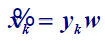

In [28]:
reconstructed_data = np.zeros([8, 2])
for i, y_k_value in zip(range(n), y_k):
    approximation = (y_k_value * w).reshape(-1, 1)
    reconstructed_data[i] = approximation.T

In [29]:
print(f'Reconstructed Data = \n{reconstructed_data}')

Reconstructed Data = 
[[ -6.57436998   7.21854456]
 [-10.45562454  11.48009496]
 [ -8.19023923   8.99274105]
 [-11.53287071  12.66289262]
 [ 12.07149379 -13.25429145]
 [ 15.41412527 -16.92444302]
 [ 18.64586377 -20.47283601]
 [ 10.45562454 -11.48009496]]


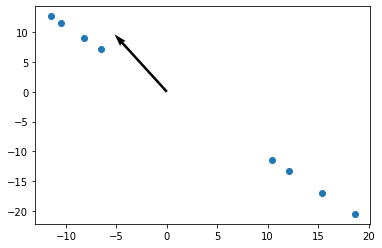

In [30]:
plt.scatter(x = reconstructed_data[:, 0], y = reconstructed_data[:, 1])
plt.quiver(0, 0, *w, scale=15)

As can be seen in the plot above, the **original data has been projected onto transform vector w** (black arrow). 

As mentioned, **LDA finds the projection that best separates the data**. This is proven above, as we can see that there is a clear separation in the data points between the 2 classes. This makes LDA not only useful for dimensionality reduction, but also for **classification**.